<a href="https://colab.research.google.com/github/RKS8347/Ml-projects/blob/main/Financial_News_Headline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all required libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Basic EDA on cnbc_headlines dataset
cnbc_headlines=pd.read_csv('/content/cnbc_headlines.csv')
guardian_headlines=pd.read_csv('/content/guardian_headlines.csv')
reuters_headlines=pd.read_csv('/content/reuters_headlines.csv')

In [ ]:
cnbc_headlines.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
#check the shape of cnbc  headlines
cnbc_headlines.shape

(3080, 3)

In [ ]:
# check all columns in the cnbc headlines datasets
cnbc_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# check which columns are having categorical,numerical or boolean value
cnbc_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# check missing values in all the columns of cnbc news headline data sets
cnbc_headlines.isnull().sum()

,0
Headlines,280
Time,280
Description,280


In [ ]:
#drop nan values in data sets
cnbc_headlines=cnbc_headlines.dropna()

In [ ]:
# checking null values
cnbc_headlines.isnull().sum()

,0
Headlines,0
Time,0
Description,0


In [ ]:
# drop duplicate values rows in data sets and keep first one
cnbc_headlines=cnbc_headlines.drop_duplicates(subset=['Headlines','Description'],keep='first')
cnbc_headlines.reset_index(drop=True,inplace=True)
cnbc_headlines

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [ ]:
cnbc_headlines.shape

(2790, 3)

In [ ]:
# Basic EDA on Guardian Headlines Dataset
guardian_headlines.shape

(17800, 2)

In [ ]:
guardian_headlines.columns

Index(['Time', 'Headlines'], dtype='object')

In [ ]:
guardian_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
guardian_headlines.isnull().sum()

,0
Time,0
Headlines,0


In [ ]:
# drop duplicate rows in headlines and keep the first one
guardian_headlines.drop_duplicates(subset=['Headlines'],keep='first')
guardian_headlines.reset_index(drop=True,inplace=True)
guardian_headlines

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [ ]:
guardian_headlines.shape

(17800, 2)

# **Basic Eda on reuters headlines**

In [ ]:
reuters_headlines.shape

(32770, 3)

In [ ]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [ ]:
reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
reuters_headlines.isnull().sum()

,0
Headlines,0
Time,0
Description,0


In [ ]:
# drop duplicate rows in reuters haedlines datasets and keep the first one
reuters_headlines.drop_duplicates(subset=['Headlines','Description'],keep='first')
reuters_headlines.reset_index(drop=True,inplace=True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


# Now Preprocessing the Text data

In [ ]:
def preprocessing_text(text):

  # remove urls
  text=re.sub(r'http\S+|www\S+|https\S+','',text)

  # convert all to lowercase
  text=text.lower()

  # remove puntuations
  text=text.translate(str.maketrans('','',string.punctuation))

  # remove stopwords
  stop_words=set(stopwords.words('english'))
  word_tokens=word_tokenize(text)
  filtered_words=[word for word in word_tokens if word not in stop_words]

  # steaming
  ps=PorterStemmer()
  stemmed_words=[ps.stem(word) for word in filtered_words]

  # lemmitizing
  lemmatizer=WordNetLemmatizer()
  lemmatized_words=[lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]

  return ' '.join(lemmatized_words)


# Sentiment analysisi
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a popular rule-based sentiment analysis tool, particularly well-suited for analyzing social media text. It's designed to detect the sentiment behind a piece of text (positive, neutral, or negative) and is efficient for short, informal language commonly found in tweets, reviews, and other social media content.


In [ ]:
# Import natural language Tool kit
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# create sentiment analyser object
analyzer=SentimentIntensityAnalyzer()

In [ ]:
# function to decide sentiment are positive,negative and neutral
def get_analysis(score):
  if score < 0.0:
    return 'Negative'
  elif score == 0.0:
    return 'Neutral'
  else:
    return 'Positive'

# Now working with description on dtasets

In [ ]:
# concatenate cnbc headlines dataset and reuters headlines datasets
new_data=pd.concat([cnbc_headlines,reuters_headlines],axis=0)

In [ ]:
# check the shape of this new dataset
new_data.shape

(35560, 3)

In [ ]:
# make copy of new data set
new_data_copy=new_data.copy()

In [ ]:
# apply preprocessing to the description of new data sets
new_data['Description']=new_data['Description'].apply(preprocessing_text)
# view the first 20 rows of the dataframe
new_data.head(20)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [ ]:
# analyse polarity score of values in description and add new column of it in dataset
# analyzer.polarity_scores(value) returns a dictionary with various sentiment scores like
# neg, neu, pos, and compound for the text value.
# ['compound'] extracts the compound score, which represents the overall sentiment of the text on a scale
# from -1 (very negative) to 1 (very positive).
ds_score = []
for value in new_data['Description'].values:
  # ds_score.append(...) adds the extracted compound score to the ds_score list.
  ds_score.append(analyzer.polarity_scores(value)['compound'])

new_data['ds_score'] = ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [ ]:
# apply function which decides sentiments to polarity score column
new_data['ds_score']=new_data['ds_score'].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<ipython-input-102-5b906e66be6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ds_score', data=new_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

<Axes: xlabel='ds_score', ylabel='count'>

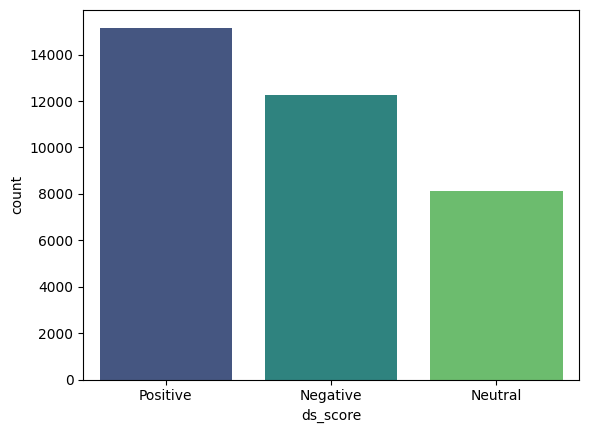

In [ ]:
# plot count plot on description score column
import seaborn as sns
sns.countplot(x='ds_score', data=new_data, palette='viridis')

# **Modelling on Description**

In [ ]:
# split dataset into train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data['Description'], new_data.ds_score, test_size=0.1,
                                                    random_state=212)


In [ ]:
%%time
# pipeline creation
# 1. TfidfVectorization
# 2. linearSVC model
pipe= Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])

# fit the pipeline to the data
linear_svc_model=pipe.fit(X_train,y_train)

# predict on test dataset
prediction=linear_svc_model.predict(X_test)
print("MODEl - LINEAR SVC")

#print accuracy score
accuracy_lsv=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))


MODEl - LINEAR SVC
accuracy:93.59% 
Confusion Matrix: 
 [[1098   30   62]
 [  22  791   26]
 [  54   34 1439]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1190
     Neutral       0.93      0.94      0.93       839
    Positive       0.94      0.94      0.94      1527

    accuracy                           0.94      3556
   macro avg       0.93      0.94      0.94      3556
weighted avg       0.94      0.94      0.94      3556

CPU times: user 4.78 s, sys: 12 ms, total: 4.79 s
Wall time: 3.08 s


# Logistic Regression

In [ ]:
# pipeline creation
# 1. CountVectorisation
# CountVectorizer is another popular text feature extraction method used in Natural Language Processing (NLP).
# 2. Tfidftransformer
#3. Logistic Regression
# Logistic Regression is a popular machine learning algorithm used for binary
#classification problems (though it can be extended to multi-class classification).

pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])

# fit pipeline to the train data
log_model=pipe.fit(X_train,y_train)

# predict on test dataset
prediction=log_model.predict(X_test)
print("MODEl - LOGISTIC REGRESSION")

#print accuracy score
accuracy_log_D = print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print(confusion_matrix(y_test,prediction))

# print classification report
print(classification_report(y_test,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEl - LOGISTIC REGRESSION
accuracy:90.41% 
[[1043   59   88]
 [  34  764   41]
 [  71   48 1408]]
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      1190
     Neutral       0.88      0.91      0.89       839
    Positive       0.92      0.92      0.92      1527

    accuracy                           0.90      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.90      0.90      0.90      3556



# MultiNomial NaiveBase
#It computes the probability of each class based on the frequencies of words in the training data.

In [ ]:
%%time
#pipeline Creation
# 1.countvectoriser
#2. TfidfTransformer
#3. MultinomialNB(NaiveBase)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])

Nb_model=Pipe.fit(X_train,y_train)

# predict on test data
prediction=Nb_model.predict(X_test)
print("MODEl - MULTINOMIAL NAIVE BAYES")

# print accuracy score
accuracy_Nb=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - MULTINOMIAL NAIVE BAYES
accuracy:64.29% 
Confusion Matrix: 
 [[ 772   10  408]
 [ 156  102  581]
 [ 114    1 1412]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.74      0.65      0.69      1190
     Neutral       0.90      0.12      0.21       839
    Positive       0.59      0.92      0.72      1527

    accuracy                           0.64      3556
   macro avg       0.74      0.57      0.54      3556
weighted avg       0.71      0.64      0.59      3556

CPU times: user 1.13 s, sys: 5.89 ms, total: 1.14 s
Wall time: 1.14 s


# Bernoulli Naive bayes
# Works with binary data (whether a word appears in a document or not).

In [ ]:
%%time
#pipeline Creation
# 1.countvectoriser
#2. TfidfTransformer
#3. BernoulliNB(NaiveBase)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',BernoulliNB())])

BNb_model=Pipe.fit(X_train,y_train)

# predict on test data
prediction=BNb_model.predict(X_test)
print("MODEl - BernoulliNB NAIVE BAYES")

# print accuracy score
accuracy_Nb=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - BernoulliNB NAIVE BAYES
accuracy:74.38% 
Confusion Matrix: 
 [[ 885   61  244]
 [ 130  514  195]
 [ 202   79 1246]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.73      0.74      0.74      1190
     Neutral       0.79      0.61      0.69       839
    Positive       0.74      0.82      0.78      1527

    accuracy                           0.74      3556
   macro avg       0.75      0.72      0.73      3556
weighted avg       0.75      0.74      0.74      3556

CPU times: user 1.08 s, sys: 9 ms, total: 1.09 s
Wall time: 1.1 s


# Gradient Boosting Classification

In [ ]:
%%time
# PipeLine Creation
# 1. CountVectoriser
# 2. TfidfTransformer
# 3. GradientBoostingClassifier

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',GradientBoostingClassifier(loss='log_loss', # Changed 'deviance' to 'log_loss' to reflect updated parameter options.
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit the pipeline to the data
GBC_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=GBC_model.predict(X_test)
print("MODEl - Gradient Boosting Classifier")

#print accuracy score
GBC_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - Gradient Boosting Classifier
accuracy:42.91% 
Confusion Matrix: 
 [[   3    0 1187]
 [   0    0  839]
 [   4    0 1523]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.43      0.00      0.01      1190
     Neutral       0.00      0.00      0.00       839
    Positive       0.43      1.00      0.60      1527

    accuracy                           0.43      3556
   macro avg       0.29      0.33      0.20      3556
weighted avg       0.33      0.43      0.26      3556

CPU times: user 22 s, sys: 29.9 ms, total: 22 s
Wall time: 22.2 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBOOST classification model

In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. XGBClassifier

from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training labels
y_train_encoded = le.fit_transform(y_train)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',XGBClassifier(loss='log_loss',
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit pipe line to data
XGB_models=Pipe.fit(X_train,y_train_encoded) # Use encoded labels for training

#predict on test data
prediction=XGB_models.predict(X_test)
# Inverse transform the encoded predictions to get labels
prediction = le.inverse_transform(prediction) # Added this line to inverse transform the predictions
print("MODEl - XGBOOST CLASSIFIER")


#print accuracy score
XGB_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:56:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)


MODEl - XGBOOST CLASSIFIER
accuracy:49.35% 
Confusion Matrix: 
 [[ 269    0  921]
 [   2    0  837]
 [  41    0 1486]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1190
     Neutral       0.00      0.00      0.00       839
    Positive       0.46      0.97      0.62      1527

    accuracy                           0.49      3556
   macro avg       0.44      0.40      0.33      3556
weighted avg       0.49      0.49      0.39      3556

CPU times: user 19.6 s, sys: 188 ms, total: 19.7 s
Wall time: 12.8 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision trees

In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. Decision tree

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    splitter='best',
                                                    random_state=2020))])

# fit the pipe line to the data
DT_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=DT_model.predict(X_test)
print("MODEl - DECISION TREE")

#print accuracy score
DT_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

MODEl - DECISION TREE
accuracy:48.68% 
Confusion Matrix: 
 [[1045    0  145]
 [ 831    1    7]
 [ 842    0  685]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.38      0.88      0.53      1190
     Neutral       1.00      0.00      0.00       839
    Positive       0.82      0.45      0.58      1527

    accuracy                           0.49      3556
   macro avg       0.73      0.44      0.37      3556
weighted avg       0.72      0.49      0.43      3556

CPU times: user 3.01 s, sys: 6.26 ms, total: 3.02 s
Wall time: 3.01 s


# KNN

In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. KNN classifier

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',KNeighborsClassifier(n_neighbors=10,
                                              weights='distance',algorithm='brute'))])

# fit the pipe line to the data
KNN_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=KNN_model.predict(X_test)
print("MODEl - K NEAREST NEIGHBOUR")

#print accuracy score
KNN_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

MODEl - K NEAREST NEIGHBOUR
accuracy:57.2% 
Confusion Matrix: 
 [[ 693  133  364]
 [ 208  297  334]
 [ 283  200 1044]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.59      0.58      0.58      1190
     Neutral       0.47      0.35      0.40       839
    Positive       0.60      0.68      0.64      1527

    accuracy                           0.57      3556
   macro avg       0.55      0.54      0.54      3556
weighted avg       0.56      0.57      0.57      3556

CPU times: user 4.52 s, sys: 2.17 s, total: 6.69 s
Wall time: 6.68 s


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target labels (y_train and y_test) to numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now modify your compare_models function to handle encoded y_train and y_test
def compare_models(models, names, X_train, X_test, y_train_encoded, y_test_encoded):
    for model, name in zip(models, names):
        print(f"Model: {name}")

        # Ensure the model is fitted (if not already fitted)
        model.fit(X_train, y_train_encoded)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Convert y_pred to the same dtype as y_test (optional)
        y_pred = y_pred.astype(y_test_encoded.dtype)

        # Generate the classification report
        res = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
        print(res)
        print("--------------------------------------------------------------------------------")

# Create a list of model objects (ensure that these models are already initialized)
models = [linear_svc_model, log_model, Nb_model, BNb_model, GBC_model, XGB_models, DT_model, KNN_model]

# Corresponding model names
names = ['Linear SVC', 'Logistic Regression', 'Multinomial NB', 'Bernoulli NB', 'Gradient Boosting Classifier',
         'XGBoost', 'Decision Tree', 'K-Nearest Neighbors']

# Call the comparison function with the encoded labels
compare_models(models, names, X_train, X_test, y_train_encoded, y_test_encoded)


Model: Linear SVC
              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1190
     Neutral       0.93      0.94      0.93       839
    Positive       0.94      0.94      0.94      1527

    accuracy                           0.94      3556
   macro avg       0.93      0.94      0.94      3556
weighted avg       0.94      0.94      0.94      3556

--------------------------------------------------------------------------------
Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      1190
     Neutral       0.88      0.91      0.89       839
    Positive       0.92      0.92      0.92      1527

    accuracy                           0.90      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.90      0.90      0.90      3556

--------------------------------------------------------------------------------
Model: Multinomial NB
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.69      1190
     Neutral       0.90      0.12      0.21       839
    Positive       0.59      0.92      0.72      1527

    accuracy                           0.64      3556
   macro avg       0.74      0.57      0.54      3556
weighted avg       0.71      0.64      0.59      3556

--------------------------------------------------------------------------------
Model: Bernoulli NB
              precision    recall 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.43      0.00      0.01      1190
     Neutral       0.00      0.00      0.00       839
    Positive       0.43      1.00      0.60      1527

    accuracy                           0.43      3556
   macro avg       0.29      0.33      0.20      3556
weighted avg       0.33      0.43      0.26      3556

--------------------------------------------------------------------------------
Model: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with n

              precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1190
     Neutral       0.00      0.00      0.00       839
    Positive       0.46      0.97      0.62      1527

    accuracy                           0.49      3556
   macro avg       0.44      0.40      0.33      3556
weighted avg       0.49      0.49      0.39      3556

--------------------------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

    Negative       0.38      0.88      0.53      1190
     Neutral       1.00      0.00      0.00       839
    Positive       0.82      0.45      0.58      1527

    accuracy                           0.49      3556
   macro avg       0.73      0.44      0.37      3556
weighted avg       0.72      0.49      0.43      3556

--------------------------------------------------------------------------------
Model: K-Nearest Neighbors
              precision    r

# work on test datasets

In [ ]:
# perform prediction on the test datasets
prediction=linear_svc_model.predict(X_test)
print(prediction)

[1 1 2 ... 2 0 2]


In [ ]:
# creating dataframe of predicted result
predictions=pd.DataFrame(prediction)

In [ ]:
predictions.head()

,0
0,1
1,1
2,2
3,0
4,1


# Now working with headlines + description

In [ ]:
new_data.head(20)

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...,Negative
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...,Positive
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...,Negative
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...,Negative
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...,Neutral


In [ ]:
# merge headline and Description of new dataset and name it info
new_data['info']=new_data['Headlines'] + new_data['Description']
new_data.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [ ]:
# Only keep info and Time columns drop all remaining columns
new_data=new_data.drop(['Headlines','Description','ds_score'],axis=1)
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [ ]:
# apply preprocessing on info columns
new_data['info']=new_data['info'].apply(preprocessing_text)
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [ ]:
# analyze polarity score of values in info  and add new column of it in dataset
info_score=[]

for value in new_data['info'].values:
  info_score.append(analyzer.polarity_scores(value)['compound'])

new_data['info_score'] = info_score
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32767,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [ ]:
# apply function that decides sentiment to polarity score column
new_data['info_score']=new_data['info_score'].apply(get_analysis)
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32767,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


<ipython-input-122-ac60ab9e4a01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='info_score', data=new_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

<Axes: xlabel='info_score', ylabel='count'>

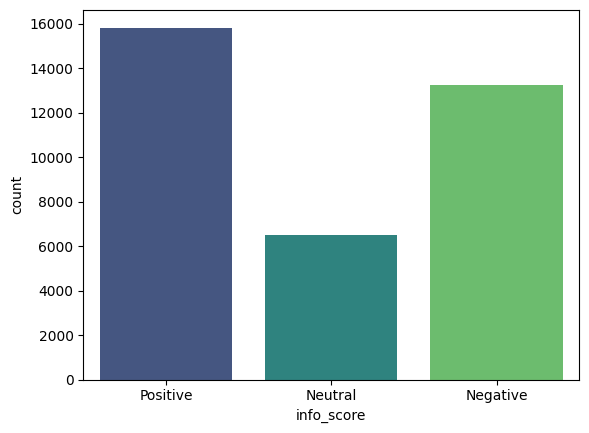

In [ ]:
# plot count plot on description score column
import seaborn as sns
sns.countplot(x='info_score', data=new_data, palette='viridis')

In [ ]:
new_data.describe()

,Time,info,info_score
count,35560,35560,35560
unique,3318,35437,3
top,Mar 19 2020,take five world market theme week aheadfollow ...,Positive
freq,126,13,15826


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35560 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Time        35560 non-null  object
 1   info        35560 non-null  object
 2   info_score  35560 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


#** Modeling on headlines + Description**

In [ ]:
# split the data set into test and train
# 90% train 10% test and random state 22
X_train, X_test, y_train, y_test = train_test_split(new_data['info'], new_data.info_score, test_size=0.1,
                                                    random_state=212)


# **Linear Support Vector Machine**

In [ ]:
%%time
# Pipeline creation
# 1.tfidf vectoriser
# 2. LinearSVC model

pipe= Pipeline([('tfidf',TfidfVectorizer()),
                ('model',LinearSVC())])

# fit the pipeline to the data
linear_svc_model=pipe.fit(X_train,y_train)

# predict on test dataset
prediction=linear_svc_model.predict(X_test)
print("MODEl - LINEAR SVC")

#print accuracy score
accuracy_lsv=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - LINEAR SVC
accuracy:90.78% 
Confusion Matrix: 
 [[1184   41   80]
 [  40  556   60]
 [  65   42 1488]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.91      0.91      1305
     Neutral       0.87      0.85      0.86       656
    Positive       0.91      0.93      0.92      1595

    accuracy                           0.91      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.91      0.91      0.91      3556

CPU times: user 2.49 s, sys: 23.5 ms, total: 2.51 s
Wall time: 2.53 s


In [ ]:
# pipeline creation
# 1. CountVectorisation
# CountVectorizer is another popular text feature extraction method used in Natural Language Processing (NLP).
# 2. Tfidftransformer
#3. Logistic Regression
# Logistic Regression is a popular machine learning algorithm used for binary
#classification problems (though it can be extended to multi-class classification).

pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])

# fit pipeline to the train data
log_model=pipe.fit(X_train,y_train)

# predict on test dataset
prediction=log_model.predict(X_test)
print("MODEl - LOGISTIC REGRESSION")

#print accuracy score
accuracy_log_D = print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print(confusion_matrix(y_test,prediction))

# print classification report
print(classification_report(y_test,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEl - LOGISTIC REGRESSION
accuracy:87.46% 
[[1146   42  117]
 [  69  494   93]
 [  86   39 1470]]
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      1305
     Neutral       0.86      0.75      0.80       656
    Positive       0.88      0.92      0.90      1595

    accuracy                           0.87      3556
   macro avg       0.87      0.85      0.86      3556
weighted avg       0.87      0.87      0.87      3556



In [ ]:
%%time
#pipeline Creation
# 1.countvectoriser
#2. TfidfTransformer
#3. MultinomialNB(NaiveBase)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',MultinomialNB())])

Nb_model=Pipe.fit(X_train,y_train)

# predict on test data
prediction=Nb_model.predict(X_test)
print("MODEl - MULTINOMIAL NAIVE BAYES")

# print accuracy score
accuracy_Nb=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - MULTINOMIAL NAIVE BAYES
accuracy:64.31% 
Confusion Matrix: 
 [[ 821    0  484]
 [ 132   11  513]
 [ 138    2 1455]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.75      0.63      0.69      1305
     Neutral       0.85      0.02      0.03       656
    Positive       0.59      0.91      0.72      1595

    accuracy                           0.64      3556
   macro avg       0.73      0.52      0.48      3556
weighted avg       0.70      0.64      0.58      3556

CPU times: user 1.52 s, sys: 15.1 ms, total: 1.54 s
Wall time: 1.54 s


In [ ]:
%%time
# PipeLine Creation
# 1. CountVectoriser
# 2. TfidfTransformer
# 3. GradientBoostingClassifier

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',GradientBoostingClassifier(loss='log_loss', # Changed 'deviance' to 'log_loss' to reflect updated parameter options.
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit the pipeline to the data
GBC_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=GBC_model.predict(X_test)
print("MODEl - Gradient Boosting Classifier")

#print accuracy score
GBC_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - Gradient Boosting Classifier
accuracy:45.13% 
Confusion Matrix: 
 [[  10    0 1295]
 [   0    0  656]
 [   0    0 1595]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       1.00      0.01      0.02      1305
     Neutral       0.00      0.00      0.00       656
    Positive       0.45      1.00      0.62      1595

    accuracy                           0.45      3556
   macro avg       0.48      0.34      0.21      3556
weighted avg       0.57      0.45      0.28      3556

CPU times: user 27.7 s, sys: 38.3 ms, total: 27.8 s
Wall time: 27.9 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. XGBClassifier

from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training labels
y_train_encoded = le.fit_transform(y_train)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',XGBClassifier(loss='log_loss',
                                                    learning_rate=0.01,
                                                    n_estimators=10,
                                                    max_depth=5,
                                                    random_state=55))])

# fit pipe line to data
XGB_models=Pipe.fit(X_train,y_train_encoded) # Use encoded labels for training

#predict on test data
prediction=XGB_models.predict(X_test)
# Inverse transform the encoded predictions to get labels
prediction = le.inverse_transform(prediction) # Added this line to inverse transform the predictions
print("MODEl - XGBOOST CLASSIFIER")


#print accuracy score
XGB_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "loss" } are not used.

  warnings.warn(smsg, UserWarning)


MODEl - XGBOOST CLASSIFIER
accuracy:51.8% 
Confusion Matrix: 
 [[ 292    0 1013]
 [   3    0  653]
 [  45    0 1550]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.86      0.22      0.36      1305
     Neutral       0.00      0.00      0.00       656
    Positive       0.48      0.97      0.64      1595

    accuracy                           0.52      3556
   macro avg       0.45      0.40      0.33      3556
weighted avg       0.53      0.52      0.42      3556

CPU times: user 23.8 s, sys: 232 ms, total: 24 s
Wall time: 15.2 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
%%time
#pipeline Creation
# 1.countvectoriser
#2. TfidfTransformer
#3. BernoulliNB(NaiveBase)

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',BernoulliNB())])

BNb_model=Pipe.fit(X_train,y_train)

# predict on test data
prediction=BNb_model.predict(X_test)
print("MODEl - BernoulliNB NAIVE BAYES")

# print accuracy score
accuracy_Nb=print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction))

MODEl - BernoulliNB NAIVE BAYES
accuracy:69.85% 
Confusion Matrix: 
 [[ 994    6  305]
 [ 176  162  318]
 [ 248   19 1328]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.70      0.76      0.73      1305
     Neutral       0.87      0.25      0.38       656
    Positive       0.68      0.83      0.75      1595

    accuracy                           0.70      3556
   macro avg       0.75      0.61      0.62      3556
weighted avg       0.72      0.70      0.67      3556

CPU times: user 1.47 s, sys: 15 ms, total: 1.48 s
Wall time: 1.49 s


In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. Decision tree

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    splitter='best',
                                                    random_state=2020))])

# fit the pipe line to the data
DT_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=DT_model.predict(X_test)
print("MODEl - DECISION TREE")

#print accuracy score
DT_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

MODEl - DECISION TREE
accuracy:52.19% 
Confusion Matrix: 
 [[1159    3  143]
 [ 651    0    5]
 [ 896    2  697]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.43      0.89      0.58      1305
     Neutral       0.00      0.00      0.00       656
    Positive       0.82      0.44      0.57      1595

    accuracy                           0.52      3556
   macro avg       0.42      0.44      0.38      3556
weighted avg       0.53      0.52      0.47      3556

CPU times: user 4.29 s, sys: 13.1 ms, total: 4.31 s
Wall time: 4.3 s


In [ ]:
%%time
# pipeline creation
# 1. Count Vectoriser
# 2. TfidfTransformer
# 3. KNN classifier

Pipe= Pipeline([('count',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',KNeighborsClassifier(n_neighbors=10,
                                              weights='distance',algorithm='brute'))])

# fit the pipe line to the data
KNN_model=Pipe.fit(X_train,y_train)

# predict on test dataset
prediction=KNN_model.predict(X_test)
print("MODEl - K NEAREST NEIGHBOUR")

#print accuracy score
KNN_accuracy= print("accuracy:{}% ".format(round(accuracy_score(y_test,prediction)*100,2)))

# print confusion matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,prediction))

# print classification report
print("Classification Report: \n",classification_report(y_test,prediction)) # Use classification_report instead of classification_matrix

MODEl - K NEAREST NEIGHBOUR
accuracy:58.49% 
Confusion Matrix: 
 [[ 819   69  417]
 [ 187  132  337]
 [ 333  133 1129]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.61      0.63      0.62      1305
     Neutral       0.40      0.20      0.27       656
    Positive       0.60      0.71      0.65      1595

    accuracy                           0.58      3556
   macro avg       0.54      0.51      0.51      3556
weighted avg       0.57      0.58      0.57      3556

CPU times: user 6.2 s, sys: 1.35 s, total: 7.55 s
Wall time: 7.78 s


# Now you can check the result on real time news headlines

In [ ]:
sent1=['GST officer detect Rs 4000 crore of ITC fraud in april-june']
y_predict=linear_svc_model.predict(sent1)
print(y_predict)

['Negative']


In [ ]:
sent2=['Finance minister implies taxes on middle class people']
y_predict=linear_svc_model.predict(sent2)
print(y_predict)

['Negative']


In [ ]:
sent3=['Finance ministery release rs 98000 crore to 17 states as grant']
y_predict=linear_svc_model.predict(sent3)
print(y_predict)

['Positive']


In [ ]:
sent3=['Finance ministery release rs 98000 crore to 17 states as Gift']
y_predict=linear_svc_model.predict(sent3)
print(y_predict)

['Positive']


In [ ]:
sent3=['Finance ministery release rs 98000 crore to 17 states of india and america']
y_predict=linear_svc_model.predict(sent3)
print(y_predict)

['Neutral']


# conclusion
# We have seen How to use NLTK for sentiments analysis in this assingment.
